## 이진분류(Binary classification)
### ex) 영화 리뷰 분류하기
- 리뷰 텍스트를 기반으로 긍/부정 분류
- 참고 : https://github.com/gilbutITbook/006975/blob/master/3.4-classifying-movie-reviews.ipynb

- <b>IMDB 데이터셋</b> :<br>
인터넷 영화 데이터베이스 리뷰 5만개로 이뤄진 데이터로<br>
훈련데이터 25000개와 테스트데이터 25000개로 나뉘어 있고 각각 50%씩 긍/부정으로 구성되어 있다.

### 1. 데이터셋 로드

In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

# num_words=10000
# : 훈련데이터에서 가장 자주 나타나는 단어 10000개만 사용(드물게 나타나는 단어 무시)

In [2]:
## 리뷰 확인해보기
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decode_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [3]:
decode_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### 2. 데이터 준비

In [4]:
print(train_data[0:2])

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

In [5]:
# 정수 시퀀스를 이진 행렬로 인코딩
import numpy as np

def vectorize_sequences(sequences, dimension=10000) :
    # 크기가 (len(sequences), dimension)인 0행렬 생성
    results  = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences) :
        # results[i]에서 특정 인덱스 위치를 1로 만듦
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)   # 훈련데이터 벡터로 변환
x_test = vectorize_sequences(test_data)     # 테스트데이터 벡터로 변환

In [6]:
x_train[0:2]

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [7]:
# 레이블데이터 벡터로 변환
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### 3. 신경망 모델 만들기

In [8]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
                       
# 16개의 은닉유닛을 가진 2개의 은닉층 생성
# 현재 리뷰의 감정을 스칼라 값의 예측으로 출력하는 세번째 층
# : 마지막 층은 0과 1사이의 점수로, 타깃이 1일 가능성이 높은 것이 
#   리뷰가 긍정일 가능성이 높다는 확률을 의미하는 바
#   이를 출력하기 위해 시그모이드 활성화 함수 사용

In [9]:
# 모델 컴파일 (손실함수, 옵티마이저 선택)
# 이진 분류에서는 mean_squared_error, binary_crossentropy 손실이 적합하다.
# 하지만 확률을 출력하는 모델을 사용할 때는 크로스엔트로피가 최선의 선택이다.
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

- 이진분류에 적합한 손실함수 : mean_squared_error, binary_crossentropy
- 이진분류이면서 확률을 출력하는 경우 적합한 손실함수 : binary_crossentropy
<br><br>
- 회귀문제에 적합한 손실함수 : mean_squared_error, mean_absolute_error

### 4. 훈련 검증

In [10]:
# 원본 훈련데이터 10000개의 샘플로 검증데이터셋 만들기
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [11]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

In [12]:
# 모델 훈련
# 512개 샘플을 미니 배치로 만들어 20번의 에포크 동안 훈련
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512, 
                    validation_data=(x_val, y_val))  # 검증데이터 전달

Epoch 1/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5305 - acc: 0.7851 - val_loss: 0.4087 - val_acc: 0.8558
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3208 - acc: 0.9009 - val_loss: 0.3128 - val_acc: 0.8874
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2357 - acc: 0.9255 - val_loss: 0.2920 - val_acc: 0.8868
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1863 - acc: 0.9406 - val_loss: 0.2850 - val_acc: 0.8853
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1534 - acc: 0.9520 - val_loss: 0.2767 - val_acc: 0.8885
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1268 - acc: 0.9615 - val_loss: 0.2854 - val_acc: 0.8856
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1085 - acc: 0.9675 - val_loss: 0.2972 - val_acc: 0.8854
Epoch 8/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0898 - a

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

model.fit() 메서드는 History 객체를 반환한다. 이 객체는 훈련하는 동안 발생한 모든 정보를 담고 있는 딕셔너리인 history 속성을 가지고 있다.<br>
이 딕셔너리는 훈련과 검증하는 동안 모니터링할 측정 지표당 하나씩 모두 네 개의 항목을 담고 있다.

In [14]:
# 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

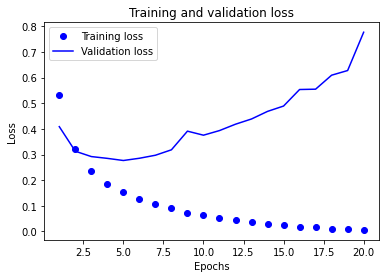

In [16]:
# 훈련, 검증 손실
plt.plot(epochs, loss, 'bo', label='Training loss')   # 'bo' 파란색 점
plt.plot(epochs, val_loss, 'b', label='Validation loss')   # 'b' 파란색 실선
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

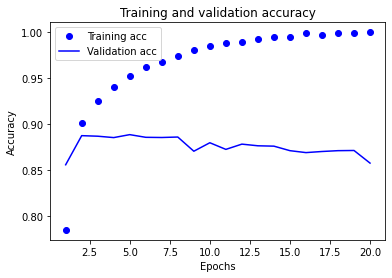

In [17]:
plt.clf()   # 그래프 초기화
acc = history_dict['acc']
val_acc = history_dict['val_acc']

# 훈련, 검증 정확도
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

훈련손실이 에포크마다 감소하고 훈련 정확도는 에포크마다 증가한다.<br>경사 하강법 최적화를 사용했을 때 반복마다 최소화되는 것이 손실이므로 기대했던 바이다.<br>
하지만 검증손실과 정확도는 이와 같지 않다. 4번째 에포크부터 손실은 증가하고 정확도는 점점 감소하며 그래프가 역전된 것을 볼 수 있다. <br>이것이 훈련 세트에서 잘 작동하는 모델이 처음 보는 데이터에 잘 작동하지 않을 수 있다고 앞서 언급한 경고의 한 사례이다. (과대적합)<br><br>
2번째 에포크 이후부터 훈련 데이터에 과도하게 최적화되어 훈련 데이터에 특화된 표현을 학습하므로 훈련 세트 이외의 데이터에는 일반화되지 못한다. <br>
이런 경우 과대적합 방지를 위해 3번째 에포크 이후 훈련을 중지할 수 있다. <br><br>
처음부터 새로운 신경망을 4번 에포크동안만 훈련후 테스트데이터에서 평가해보자

In [18]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 8ms/step - loss: 0.4818 - accuracy: 0.8093
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2757 - accuracy: 0.9078
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2100 - accuracy: 0.9282
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3069 - accuracy: 0.8777


In [19]:
results

[0.30694204568862915, 0.8776800036430359]

results 는 loss: 0.3069 - accuracy: 0.8777 로 아주 단순한 방식으로도 87%의 정확도를 달성한다.<br>
최고수준 기법을 사용하면 95%에 가까운 성능을 얻을 수 있다.

### 5. 훈련된 모델로 새로운 데이터 예측하기

In [20]:
model.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[0.1778116 ],
       [0.9988224 ],
       [0.71696854],
       ...,
       [0.09512016],
       [0.05127264],
       [0.48686466]], dtype=float32)

이 모델은 어떤 샘플에 대해 확신을 가지고 있지만(0.99 또는 그 이상, 0.01 또는 그 이하) 어떤 샘플에 대해서는 확신이 부족하다(0.6, 0.4)

여기서는 두 개의 은닉층을 사용했지만, 한 개 또는 세 개의 은닉층을 사용하고 검증과 테스트 정확도에 어떤 영향을 미치는지 확인해볼 수 있다.<br>
또한, 층의 은닉 유닛을 추가하거나 줄여보고 손실함수, 활성화 함수 등을 변경하며 추가 실험을 진행해볼 수 있다.

##### <정리>
- 원본 데이터를 신경망에 텐서로 주입하기 위해서는 꽤 많은 전처리가 필요하다. <br>단어 시퀀스는 이진 벡터로 인코딩될 수 있고 다른 인코딩 방식도 있다.
- relu 활성화 함수와 함께 Dense 층을 쌓은 네트워크는 (감성 분류를 포함하여) 여러 종류의 문제에 적용할 수 있어 자주 사용한다.
- (출력 클래스가 두 개인) 이진 분류 문제에서 네트워크는 하나의 유닛과 sigmoid 활성화 함수를 가진 Dense 층으로 끝나야 한다. <br>이 신경망의 출력은 확률을 나타내는 0과 1 사이의 스칼라 값이다.
- 이진 분류 문제에서 이런 스칼라 시그모이드 출력에 대해 사용할 손실 함수는 binary_crossentropy 이다.
- rmsprop 옵티마이저는 문제에 상관없이 일반적으로 충분히 좋은 선택이다.
- 훈련 데이터에 대해 성능이 향상됨에 따라 신경망은 과대적합되기 시작하고 이전에 본적 없는 데이터에서는 결과가 점점 나빠지게 된다.